In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
data=pd.read_csv('/content/Emotion_classify_Data.csv')
data.dropna(inplace=True)
data['Emotion'].value_counts()
data


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [6]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
reviews = cv.fit_transform(data['Comment']).toarray()
data['Emotion']=data['Emotion'].replace(['anger','joy','fear'],[1,0,-1])


<ipython-input-6-24d891dc472e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Emotion']=data['Emotion'].replace(['anger','joy','fear'],[1,0,-1])


In [7]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.model_selection import train_test_split

In [8]:
Comment_train,Comment_test,Emotion_train,Emotion_test=train_test_split(reviews,data['Emotion'],test_size=0.2,random_state=0)
model.fit(Comment_train,Emotion_train)


LogisticRegression()

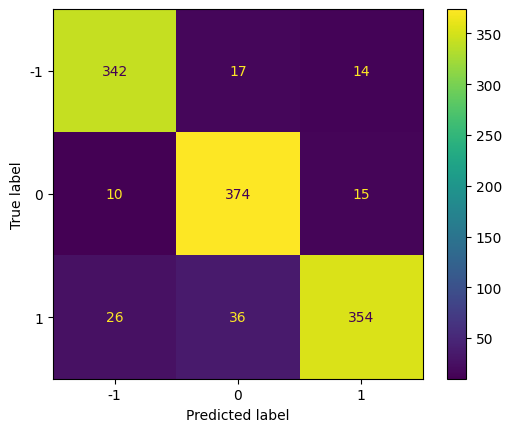

In [9]:
predict = model.predict(Comment_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Emotion_test,predict,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [10]:
def sentiment_analysis(text):
  text_vectorized = cv.transform([text]).toarray()
  prediction = model.predict(text_vectorized)[0]
  if prediction == 1:
    outcome = 'Anger'
  elif prediction == 0:
    outcome = 'Joy'
  else:
    outcome = 'fear'
  return outcome

In [12]:
sentiment_analysis('im good') # type the sentence as your wish

'Joy'

# New Section